In [ ]:
# Ładowanie potrzebych modułów
# MNIST - zbiór obrazów z odręcznie pisanymi cyframi od 0 do 9
# Sequential- model sekwencyjny sieci neuronowej

from keras.datasets import mnist
from keras.utils import np_utils
from keras import layers
from keras import models
from keras.utils import to_categorical
from matplotlib import pyplot as plt

# Wczytywanie danych
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Przekształcanie wielkości obrazów do 28x28x1 pixel oraz ich normalizacja
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# Pobranie i stworzenie listy klas dla danych
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Tworzenie modelu sieci
model = models.Sequential()

# Dodanie pierwszej warstwy konwolucyjnej złożonej z 32 kerneli o wielkości 3x3
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Dodanie warstwy zmiejszającej wielkość powstałych obrazów z warstwy konwolucyjnej
model.add(layers.MaxPooling2D((2, 2)))

# Dodanie drugiej warstwy konwolucyjnej
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Dodanie warstwy spłaszczającej dane 2D do 1D

model.add(layers.Flatten())

# Dodanie warstwy gęstej odpowiedzialnej za klasę - liczbla neuronow = liczba klas
model.add(layers.Dense(10, activation='softmax'))

#Kompilacja modelu
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

11490434/11490434 [==============================] - 0s 0us/step


Epoch 1/5
938/938 [==============================] - 94s 99ms/step - loss: 0.1356 - accuracy: 0.9588 - val_loss: 0.0567 - val_accuracy: 0.9823
Epoch 2/5
938/938 [==============================] - 93s 99ms/step - loss: 0.0422 - accuracy: 0.9870 - val_loss: 0.0435 - val_accuracy: 0.9863
Epoch 3/5
938/938 [==============================] - 93s 99ms/step - loss: 0.0305 - accuracy: 0.9909 - val_loss: 0.0236 - val_accuracy: 0.9923
Epoch 4/5
938/938 [==============================] - 92s 98ms/step - loss: 0.0241 - accuracy: 0.9931 - val_loss: 0.0247 - val_accuracy: 0.9920
Epoch 5/5
938/938 [==============================] - 94s 100ms/step - loss: 0.0202 - accuracy: 0.9940 - val_loss: 0.0234 - val_accuracy: 0.9926
{'loss': [0.13557970523834229, 0.04216262325644493, 0.03048855811357498, 0.0241167601197958, 0.020170537754893303], 'accuracy': [0.9588333368301392, 0.9869999885559082, 0.9908833503723145, 0.9930833578109741, 0.9940166473388672], 'val_loss': [0.056707825511693954, 0.04347776249051094

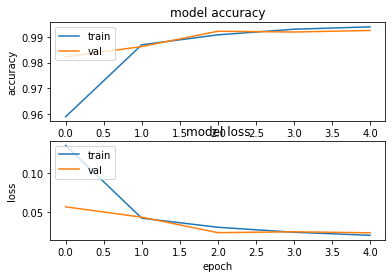

In [ ]:
# Uczenie modelu danymi
# epoch - liczba iteracji
# batch_size - liczba elemenów z danych treningowych branych podczas pojedyńczego przejścia funkcji uczącej
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, batch_size=64, verbose=1)

print(history.history)
# wyświetlenie wykresu przedstawiającego historię uczenia sieci
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Zad 2

In [ ]:
model.save('models/mnist_model.h5')

In [ ]:
import tensorflow as tf

pretrained_model = tf.keras.models.load_model('models/mnist_model.h5')
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                        

In [ ]:
pretrained_model.evaluate(test_images, test_labels, verbose=2)

313/313 - 5s - loss: 0.0234 - accuracy: 0.9926 - 5s/epoch - 15ms/step


[0.023371007293462753, 0.9926000237464905]

### Zad 3

1/1 [==============================] - 0s 66ms/step
5


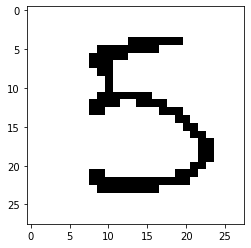

In [ ]:
import cv2

image_index = 15

im = test_images[image_index]
cv2.imwrite("filename.png", im)

image = cv2.imread("filename.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(image,cmap='Greys')
pred = pretrained_model.predict(image.reshape(1, 28, 28, 1))
print(pred.argmax())